# Exercise 2 - Logistic Regression

build a logistic regression model to predict whether a student gets admitted into a university


In [1]:
import csv
import pandas as pd
import numpy as np
from numpy import genfromtxt

data = pd.read_csv('./ex2data1.csv', delimiter=',',
                  names=['exam1','exam2', 'amitted'])
data.head()

,exam1,exam2,amitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## raw plot data

Text(0,0.5,'Exam 2 Score')

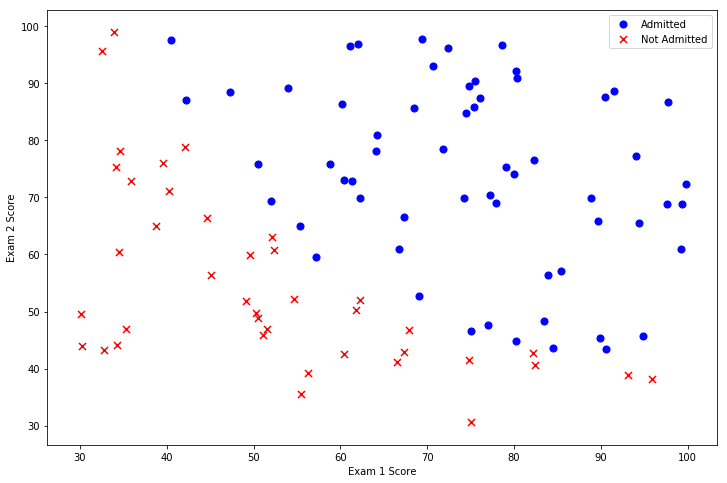

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

amitted = data[data['amitted']==1]
rejected = data[data['amitted']==0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(amitted['exam1'], amitted['exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(rejected['exam1'], rejected['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# Sigmoid function

hypothesis function 
$$ h_{\theta}(x)= g(\theta^Tx)$$

$$ g(z) =\frac{1}{1+e^{-z}}$$

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

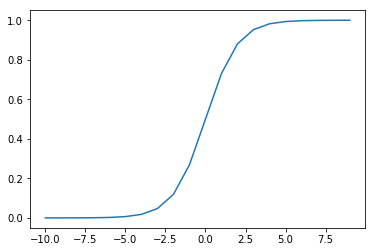

In [4]:
# sanity check 
nums = np.arange(-10,10,step =1 )

fig, ax = plt.subplots()
ax.plot(nums, sigmoid(nums))

cost function

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)} log(h_{\theta}(x^{(i)})) -(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$$


# Proof:
probability when y =1 or 0
    $$P(y=1 \mid x, \theta)= h_{\theta}(x)$$ 
    $$P(y=0 \mid x, \theta)= 1- h_{\theta}(x)$$
    
compact above two 
    $$P(y \mid x, \theta)= h_{\theta}(x)^y ( 1- h_{\theta}(x))^{1-y}$$
    
    
Likelihood of $\theta$ is 
$$L(\theta)=P(\vec{y}\mid x, \theta ) = \prod_{i}P(y^{(i)}\mid x^{(i)},\theta)$$
    $$=\prod_{i} (h_{\theta}(x^{(i)})^{y^{(i)}} ( 1- h_{\theta}(x^{(i)}))^{1-y^{(i)}})$$
    
Log Likelihood 
$$l(\theta) = log (L(\theta) )$$
$$=\sum_{i=1}^m y^{(i)}log(h_{\theta}(x^{(i)})) + (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))$$

To max log likelihood, we use 
Update $\theta$ with step $\alpha$ (learning rate ) to max $l(\theta)$

$$\theta_j := \theta_j + \alpha \triangledown_\theta l(\theta) $$
and
$$\frac{\partial }{\partial \theta_j}l(\theta) = \sum_{i=1}^m (y^{(i)}-h_{\theta}(x^{(i)}))x_j^{(i)}$$ 
    

In [5]:
def cost(theta,x,y):
    theta = np.matrix(theta)
    x= np.matrix(x)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(x*theta.T)))
    second = np.multiply( (1-y), np.log(1-sigmoid(x*theta.T)))
    
    return np.sum(first-second)/len(x)

In [6]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [7]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [8]:
cost(theta, X, y)

0.6931471805599453